In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt 


%matplotlib inline
from scipy import stats
from statsmodels.graphics.api import qqplot

# Introducción 

La mayoría de los métodos de series temporales solo son válidos si la serie temporal subyacente es estacionaria. Cuanto más estacionario es, más predecible es. 

¿Por qué nos importa si una serie es estacionaria?

1. Los procesos estacionarios se entienden mejor que los no estacionarios, y sabemos cómo estimarlos mejor. 

2. Las estadísticas  de ciertos procesos no estacionarios no siguen las distribuciones habituales. Saber cómo un proceso no es estacionario nos permitirá hacer las correcciones necesarias.

3. Si regresamos dos procesos integrados completamente no relacionados entre sí, entonces puede surgir un problema llamado "regresión espuria". En pocas palabras, si X e Y tiene una tendencia, entonces la regresión de Y en X probablemente indique una fuerte relación entre ellas, aunque no haya una conexión real. Ambos dependen del tiempo, por lo que parece que se están afectando entre sí. 

No todos los modelos AR(1) son estacionarios. Algunos crecen sin limites. Algunos tienen varianzas que cambian sobre el tiempo. ¿Qué restricciones sobre los parámetros debemos imponer en los modelos para generar procesos estacionarios?

# Restriciones sobre coeficientes AR(1)

Para el modelo 

$y_t = \beta_1 y_{t-1}+e_t$

puede ser escrito como 

$y_t - \beta_1 Ly_{t}=e_t$

donde la funci\'on $\Phi(L)=1 - \beta_1 L$ es llamada funcion lag-operator, cuya raiz caracteristica es $\frac{1}{\beta_1}$

El modelo AR(1) es estacionario si la raiz es mayor a 1 lo cual significa que $|\beta_1|<1$.

In [2]:
arparams = np.array([1, -1.7])
maparams = np.array([1])

nobs = 240

y = arma_generate_sample(arparams, maparams, nobs)

In [17]:
y=pd.DataFrame(y, columns=['y'])
y.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')

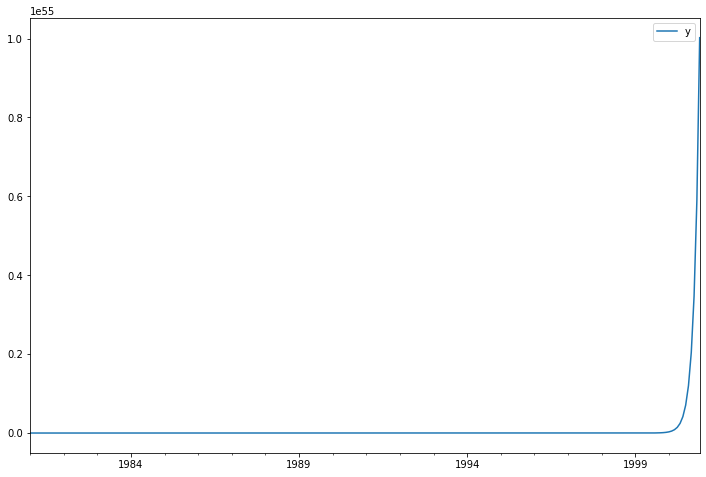

In [18]:
y.plot(figsize=(12,8))

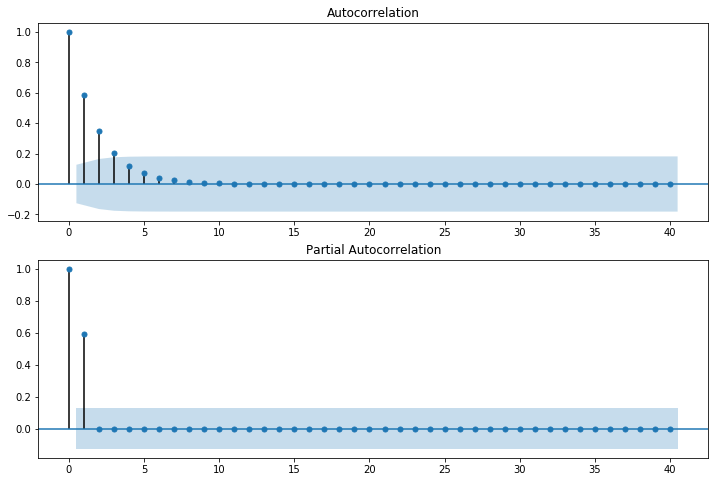

In [19]:
fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

In [20]:
# Generar el modelo
model = sm.tsa.SARIMAX(y, order=(1,0,0), trend=None)

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                                          SARIMAX Results                                          
Dep. Variable:                      y   No. Observations:                                       240
Model:               SARIMAX(1, 0, 0)   Log Likelihood      -1256184539882637507716934879150080.000
Date:                Mon, 22 Jun 2020   AIC                  2512369079765275015433869758300160.000
Time:                        22:42:03   BIC                  2512369079765275015433869758300160.000
Sample:                    01-31-1981   HQIC                 2512369079765275015433869758300160.000
                         - 12-31-2000                                                              
Covariance Type:                  opg                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      4e-34    2.5e+3

C:\Users\lfsanche\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


# Restriciones sobre coeficientes AR(2)

Considere el modelo AR(2)

$y_t = \beta_1 y_{t-1}+\beta_2 y_{t-2}+e_t$

puede ser escrito como 

$y_t - \beta_1 Ly_{t} - \beta_2 L^2y_{t}=e_t$

Donde la funcion lag-operator: $\Phi(L)=1 - \beta_1 L- \beta_2 L^2$, genera dos raices caracteristicas. El proceso AR(2) es estacionario si y solo si las raices caracteristicas estan fuera del circulo unitario (es decir son mayor a uno)

<img src="fig5.png">


# Conexion entre procesos AR y MA

## AR(1) a MA($\infty$)

Si el proceso AR(1) es estacioanrio, se lo puede expresar como un proceso MA, y viceversa.

El modelo $y_t = \beta_1 y_{t-1}+e_t$, puede ser escrito como 

$y_t(1 - \beta_1 L)=e_t$

$y_t = \frac{e_t}{1 - \beta_1 L}= e_t + \beta_1e_{t-1}+ \beta_1^2e_{t-2}+ \beta_1^3e_{t-3}...$

Entonces AR(1) se puede expresar MA($\infty$) si $|\beta_1|<1$

## Invertibilidad: De MA(1) a AR($\infty$)

La estacionariedad nos permite expresar un AR(1) como MA($\infty$). Es posible expresar un MA(1) como un AR($\infty$). Esto es posible si el proceso MA es invertible.

El modelo $x_t = \alpha_1 u_{t-1}+u_t$, puede ser escrito como 

$x_t=(1 + \alpha_1 L)u_t$

$u_t = \frac{x_t}{1 - (-\alpha_1) L}= x_t - \alpha_1x_{t-1}+ \alpha_1^2x_{t-2}-\alpha_1^3x_{t-3}...$

$ x_t = u_t + \alpha_1x_{t-1} - \alpha_1^2x_{t-2}+\alpha_1^3x_{t-3}...$


El modelo MA(1) se puede convertir en un AR($\infty$) si la raiz caracteristica de la funcion lag-operator es mayor a 1. 

In [26]:
arparams = np.array([1])
maparams = np.array([1, 1.1])

nobs = 240

x = arma_generate_sample(arparams, maparams, nobs)

In [27]:
x=pd.DataFrame(x, columns=['x'])
x.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')

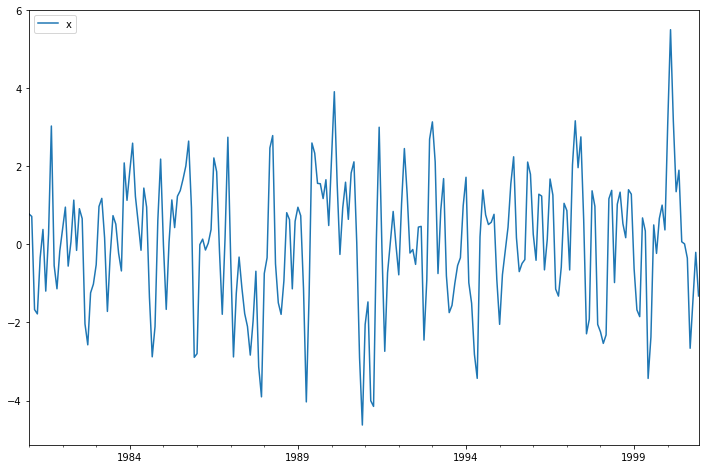

In [28]:
x.plot(figsize=(12,8))

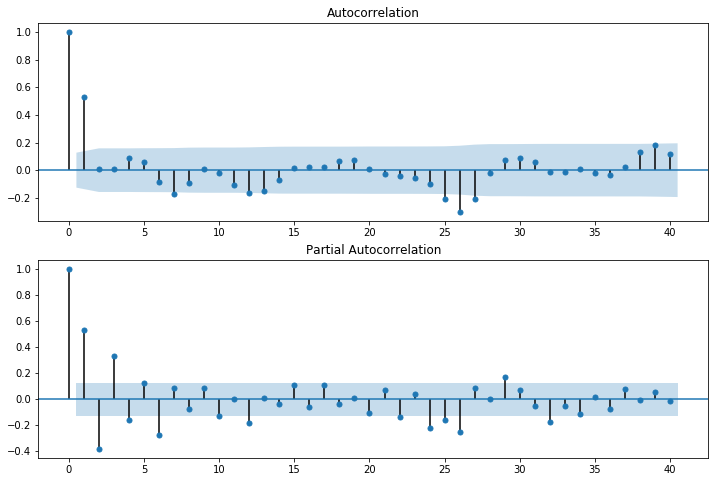

In [29]:
fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(x, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(x, lags=40, ax=ax2)

In [30]:
# Generar el modelo
model = sm.tsa.SARIMAX(x, order=(0,0,1), trend=None)

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  240
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -375.288
Date:                Mon, 22 Jun 2020   AIC                            754.576
Time:                        23:49:01   BIC                            761.537
Sample:                    01-31-1981   HQIC                           757.380
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9635      0.020     48.433      0.000       0.925       1.002
sigma2         1.3212      0.129     10.225      0.000       1.068       1.574
Ljung-Box (Q):                       53.56   Jarque-